# Ejercicio 2.1: Estados de Bell

Implementar cuatro circuitos cuánticos de forma que cada uno de ellos haga evolucionar el estado del sistema a cada uno de los cuatro estados de Bell. Describe la evolución del sistema paso a paso de dos formas: con notación de Dirac y en forma matricial. Finalmente, implementa los circuitos utilizando Qiskit Quantum Lab y verifica que los resultados son los esperados.


**Librerias**

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,QuantumRegister,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import state_fidelity

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


**Explicación de la función que genera los estados de Bell**

La función que genera los estados de Bell, `bell_state_evolution()` admite un solo parametro de entrada, el valor de dicho parametro de entrada indical cual es el estado de Bell que quiere generarse. El parametro de entrada 'state' posee cuatro valores:

- state = 0 -----------> $U_{0}|00> = \frac{1}{\sqrt{2}}(|00> + |11>)$

- state = 1 -----------> $U_{1}|00> = \frac{1}{\sqrt{2}}(|10> + |01>)$

- state = 2 -----------> $U_{2}|00> = \frac{1}{\sqrt{2}}(|00> - |11>)$

- state = 3 -----------> $U_{3}|00> = \frac{1}{\sqrt{2}}(|10> - |01>)$

Donde $U_{i}$ es el circuito $i$ que evoluciona el estado desde un estado incial $|00>$ hasta el estado final indicado. En caso de introducir un valor distinto a los indicados como parametro de entrada a la función `bell_state_evolution()` esta devolverá un error indicando **'Parametro de entrada no valido'**. Por otro lado, nos apoyaremos en la función de Qiskit **state_fidelity()**, la cual nos permite comparar como de parecidos son dos estados cuanticos, por tanto si los estados son identicos esta función devolverá el valor 1, por otro lado si los estados son diametralmente distintos, la función devolverá el valor 0. Los resultados que devuelve la función `bell_state_evolution()` en el caso de introducir un parametro valido, son:

- **result:** que indica cual es el estado final generado
- **final_state:** que indica cual es el estado final deseado
- **fidelidad:** que indica si el estado final obtenido coincide con el estado final deseado, 1 si coincide y 0 si son diamtralmente distintos
- **qc.draw():** que pinta cual es el circuito que generá el estado de Bell deseado 

**Función que genera los estados de Bell**

In [25]:
def bell_state_evolution(state):
    
    ''' 
    Función que genera los estados de Bell
    - state: indica cual es el estado de Bell final que se quiere conseguir, el parametro state solo admite cuatro valores distintos (0,1,2,4)
    '''
    
    # Crear un registro cuántico con dos qubits
    
    q = QuantumRegister(2,'qubit')
    
    # Crear un circuito cuántico
    
    qc = QuantumCircuit(q)
    
    # Asegurando que el parámetro de entrada sea un string
    
    state = str(state)
    
    # Aplicar las compuertas de evolución según el parámetro de entrada
    
    if state == "0":
        qc.h(q[0])
        qc.cx(q[0], q[1])
        expected_state = (1/2**0.5) * np.array([1, 0, 0, 1])
        final_state = "1/sqrt(2)(|00> + |11>)"
        
    elif state == "1":
        qc.x(q[1])
        qc.h(q[0])
        qc.cx(q[0], q[1])
        final_state = "1/sqrt(2)(|10> + |01>)"
        expected_state = (1/2**0.5) * np.array([0, 1, 1, 0])
        
    elif state == "2":
        qc.x(q[0])
        qc.h(q[0])
        qc.cx(q[0], q[1])
        final_state = "1/sqrt(2)(|00> - |11>)"
        expected_state = (1/2**0.5) * np.array([1, 0, 0, -1])
        
    elif state == "3":
        qc.x(q[0])
        qc.h(q[0])
        qc.x(q[1])
        qc.cx(q[0], q[1])
        final_state = "1/sqrt(2)(|10> - |01>)"
        expected_state = (1/2**0.5) * np.array([0, 1, -1, 0])
        
    else:
        
        return print("Parametro de entrada no valido")
    
    # Ejecutar el circuito para comprobrar el resultado obtenido con el resultado esperado
    
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result().get_statevector()
    
    # Comprobar la simulitud del estado final obtenido y del estado final esperado
    
    fidelidad = state_fidelity(result, expected_state)
    
    display(array_to_latex(result, prefix="- Estado \; generado: |\\psi\\rangle ="))
    
    print("Estado final deseado: ",final_state)
    print("Fidelidad:",np.around(fidelidad))
    
    return qc.draw(output='latex') 

**Ejemplos de la función bell_state_evolution()**

Estado de Bell 0

In [3]:
state_0=0

<IPython.core.display.Latex object>

Estado final deseado:  1/sqrt(2)(|00> + |11>)
Fidelidad: 1.0


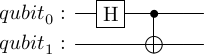

In [4]:
bell_state_evolution(state_0)

Estado de Bell 1

In [15]:
state_1=1

<IPython.core.display.Latex object>

Estado final deseado:  1/sqrt(2)(|01> + |10>)
Fidelidad: 1.0


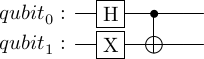

In [16]:
bell_state_evolution(state_1)

Estado de Bell 2

In [18]:
state_2=2

<IPython.core.display.Latex object>

Estado final deseado:  1/sqrt(2)(|00> - |11>)
Fidelidad: 1.0


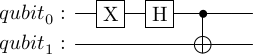

In [19]:
bell_state_evolution(state_2)

Estado de Bell 3

In [23]:
state_3=3

<IPython.core.display.Latex object>

Estado final deseado:  1/sqrt(2)(|10> - |01>)
Fidelidad: 1.0


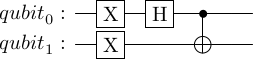

In [26]:
bell_state_evolution(state_3)

Estado de Bell no valido

In [12]:
state_no_valido=4

In [13]:
bell_state_evolution(state_no_valido)

Parametro de entrada no valido
